以下是常见的回归损失函数：MSE、MAE、Huber Loss、Log-Cosh Loss 和 Quantile Loss 的 NumPy 实现（适用于向量化计算）：

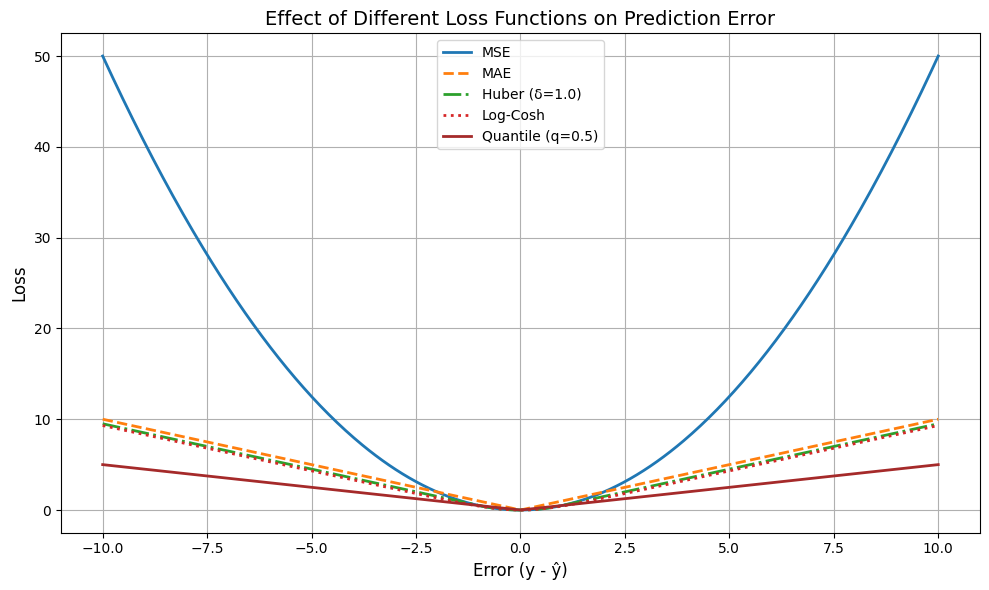

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 设置误差范围：从 -10 到 10
a = np.linspace(-10, 10, 500)

# 均方误差（MSE）
mse = 0.5 * a**2

# 绝对误差（MAE）
mae = np.abs(a)

# Huber Loss
delta = 1.0
huber = np.where(np.abs(a) <= delta,
                 0.5 * a**2,
                 delta * (np.abs(a) - 0.5 * delta))

# Log-Cosh Loss
log_cosh = np.log(np.cosh(a))

# Quantile Loss (q = 0.5)
q = 0.5
quantile = np.maximum(q * a, (q - 1) * a)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(a, mse, label="MSE", linestyle='-', linewidth=2)
plt.plot(a, mae, label="MAE", linestyle='--', linewidth=2)
plt.plot(a, huber, label="Huber (δ=1.0)", linestyle='-.', linewidth=2)
plt.plot(a, log_cosh, label="Log-Cosh", linestyle=':', linewidth=2)
plt.plot(a, quantile, label="Quantile (q=0.5)", linestyle='-', linewidth=2, color='brown')

plt.title("Effect of Different Loss Functions on Prediction Error", fontsize=14)
plt.xlabel("Error (y - ŷ)", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import numpy as np

# Loss Functions for Regression Tasks

# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Log-Cosh Loss
def log_cosh_loss(y_true, y_pred):
    error = y_true - y_pred
    return np.mean(np.log(np.cosh(error)))

# Quantile Loss
def quantile_loss(y_true, y_pred, quantile=0.5):
    error = y_true - y_pred
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

# Example usage
y_true = np.array([3.0, 5.0, 7.0])
y_pred = np.array([2.5, 5.0, 8.0])

print("MSE:", mse(y_true, y_pred))
print("MAE:", mae(y_true, y_pred))
print("Huber:", huber_loss(y_true, y_pred))
print("Log-Cosh:", log_cosh_loss(y_true, y_pred))
print("Quantile (q=0.7):", quantile_loss(y_true, y_pred, quantile=0.7))

MSE: 0.4166666666666667
MAE: 0.5
Huber: 0.20833333333333334
Log-Cosh: 0.18463177914710152
Quantile (q=0.7): 0.21666666666666667


In [ ]:
# 练习: 使用pytorch实现这些损失函数
import torch

# Mean Squared Error (MSE) in PyTorch
def mse_torch(y_true, y_pred):
    pass

# Mean Absolute Error (MAE) in PyTorch
def mae_torch(y_true, y_pred):
    pass

# Huber Loss in PyTorch
def huber_loss_torch(y_true, y_pred, delta=1.0):
    pass

def log_cosh_loss_torch(y_true, y_pred):
    pass

def quantile_loss_torch(y_true, y_pred, quantile=0.5):
    pass

# Example usage in PyTorch
# 不要修改以下代码
y_true_torch = torch.tensor([3.0, 5.0, 7.0])
y_pred_torch = torch.tensor([2.5, 5.0, 8.0])

print("MSE (PyTorch):", mse_torch(y_true_torch, y_pred_torch))
print("MAE (PyTorch):", mae_torch(y_true_torch, y_pred_torch))
print("Huber (PyTorch):", huber_loss_torch(y_true_torch, y_pred_torch))
print("Log-Cosh (PyTorch):", log_cosh_loss_torch(y_true_torch, y_pred_torch))

print("Quantile (q=0.7) (PyTorch):", quantile_loss_torch(y_true_torch, y_pred_torch, quantile=0.7))
assert torch.allclose(mse_torch(y_true_torch, y_pred_torch), torch.tensor(0.4167), atol=1e-4)
assert torch.allclose(mae_torch(y_true_torch, y_pred_torch), torch.tensor(0.5000), atol=1e-4)
assert torch.allclose(huber_loss_torch(y_true_torch, y_pred_torch), torch.tensor(0.2083), atol=1e-4)
assert torch.allclose(log_cosh_loss_torch(y_true_torch, y_pred_torch), torch.tensor(0.1846), atol=1e-4)
assert torch.allclose(quantile_loss_torch(y_true_torch, y_pred_torch, quantile=0.7), torch.tensor(0.2167), atol=1e-4)
print("恭喜你！测试通过！")


MSE (PyTorch): tensor(0.4167)
MAE (PyTorch): tensor(0.5000)
Huber (PyTorch): tensor(0.2083)
Log-Cosh (PyTorch): tensor(0.1846)
Quantile (q=0.7) (PyTorch): tensor(0.2167)
恭喜你！测试通过！


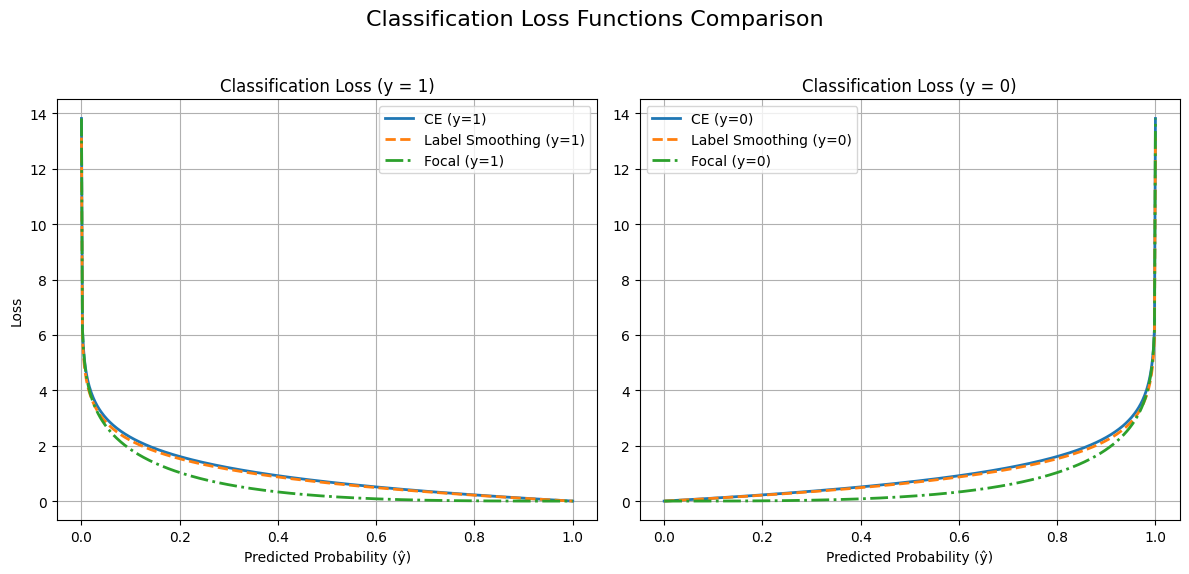

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 预测概率范围
p = np.linspace(1e-6, 1 - 1e-6, 500) # 避免对数计算中的零（0 ～ 1）

# =========================
# 设置参数
epsilon = 0.1  # label smoothing
K = 2          # 类别数
gamma = 2.0    # focal loss
# =========================

# -------- y = 1（真实为正类） --------
ce_y1 = -np.log(p)
smooth_ce_y1 = -((1 - epsilon) * np.log(p) + (epsilon / K) * (np.log(p + 1e-12)))
focal_y1 = -((1 - p) ** gamma) * np.log(p)


# -------- y = 0（真实为负类） --------
ce_y0 = -np.log(1 - p)
smooth_ce_y0 = -((1 - epsilon) * np.log(1 - p) + (epsilon / K) * (np.log(1 - p + 1e-12)))
focal_y0 = -(p ** gamma) * np.log(1 - p)


# =========================
# 绘图
# =========================

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(p, ce_y1, label="CE (y=1)", linewidth=2)
plt.plot(p, smooth_ce_y1, label="Label Smoothing (y=1)", linestyle='--', linewidth=2)
plt.plot(p, focal_y1, label="Focal (y=1)", linestyle='-.', linewidth=2)
plt.title("Classification Loss (y = 1)")
plt.xlabel("Predicted Probability (ŷ)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(p, ce_y0, label="CE (y=0)", linewidth=2)
plt.plot(p, smooth_ce_y0, label="Label Smoothing (y=0)", linestyle='--', linewidth=2)
plt.plot(p, focal_y0, label="Focal (y=0)", linestyle='-.', linewidth=2)
plt.title("Classification Loss (y = 0)")
plt.xlabel("Predicted Probability (ŷ)")
plt.grid(True)
plt.legend()

plt.suptitle("Classification Loss Functions Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [19]:
import numpy as np

# Binary Cross Entropy
def binary_cross_entropy(y_true, y_pred, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Categorical Cross Entropy (One-hot labels)
def categorical_cross_entropy(y_true, y_pred, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Label Smoothing Cross Entropy
def label_smoothing_cross_entropy(y_true, y_pred, epsilon=0.1, eps=1e-12):
    K = y_true.shape[1]  # number of classes
    y_pred = np.clip(y_pred, eps, 1 - eps)
    y_smooth = (1 - epsilon) * y_true + epsilon / K
    return -np.mean(np.sum(y_smooth * np.log(y_pred), axis=1))

# Focal Loss (Binary classification only)
def focal_loss(y_true, y_pred, gamma=2.0, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    pt = np.where(y_true == 1, y_pred, 1 - y_pred)
    return -np.mean((1 - pt) ** gamma * np.log(pt))

# KL Divergence (One-hot true vs predicted probability)
def kl_divergence(y_true, y_pred, eps=1e-12):
    y_true = np.clip(y_true, eps, 1 - eps)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return np.mean(np.sum(y_true * np.log(y_true / y_pred), axis=1))

# Example usage
y_true = np.array([[1, 0], [0, 1], [1, 0]])
y_pred = np.array([[0.9, 0.1], [0.2, 0.8], [0.6, 0.4]])
print("Binary Cross Entropy:", binary_cross_entropy(y_true[:, 0], y_pred[:, 0]))
print("Categorical Cross Entropy:", categorical_cross_entropy(y_true, y_pred))
print("Label Smoothing Cross Entropy:", label_smoothing_cross_entropy(y_true, y_pred))
print("Focal Loss:", focal_loss(y_true[:, 0], y_pred[:, 0]))
print("KL Divergence:", kl_divergence(y_true, y_pred))  


Binary Cross Entropy: 0.2797765635793423
Categorical Cross Entropy: 0.2797765635793423
Label Smoothing Cross Entropy: 0.3462596310220802
Focal Loss: 0.03057048233723506
KL Divergence: 0.2797765635520409


In [ ]:
# 练习: 使用pytorch实现这些损失函数
import torch

# Mean Squared Error (MSE) in PyTorch
def binary_cross_entropy_torch(y_true, y_pred):
    pass

# Categorical Cross Entropy in PyTorch
def categorical_cross_entropy_torch(y_true, y_pred):
    pass

# Label Smoothing Cross Entropy in PyTorch
def label_smoothing_cross_entropy_torch(y_true, y_pred, epsilon=0.1):
    pass

# Focal Loss in PyTorch
def focal_loss_torch(y_true, y_pred, gamma=2.0):
    pass          

# KL Divergence in PyTorch
def kl_divergence_torch(y_true, y_pred):
    pass

# Example usage in PyTorch
# 不要修改以下代码
y_true_torch = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 0.0]])
y_pred_torch = torch.tensor([[0.9, 0.1], [0.2, 0.8], [0.6, 0.4]])
print("Binary Cross Entropy (PyTorch):", binary_cross_entropy_torch(y_true_torch[:, 0], y_pred_torch[:, 0]))
print("Categorical Cross Entropy (PyTorch):", categorical_cross_entropy_torch(y_true_torch, y_pred_torch))
print("Label Smoothing Cross Entropy (PyTorch):", label_smoothing_cross_entropy_torch(y_true_torch, y_pred_torch))
print("Focal Loss (PyTorch):", focal_loss_torch(y_true_torch[:, 0], y_pred_torch[:, 0]))
print("KL Divergence (PyTorch):", kl_divergence_torch(y_true_torch, y_pred_torch))

assert torch.allclose(binary_cross_entropy_torch(y_true_torch[:, 0], y_pred_torch[:, 0]), torch.tensor(0.2798), atol=1e-4)
assert torch.allclose(categorical_cross_entropy_torch(y_true_torch, y_pred_torch), torch.tensor(0.2798), atol=1e-4)
assert torch.allclose(label_smoothing_cross_entropy_torch(y_true_torch, y_pred_torch), torch.tensor(0.3463), atol=1e-4)
assert torch.allclose(focal_loss_torch(y_true_torch[:, 0], y_pred_torch[:, 0]), torch.tensor(0.0306), atol=1e-4)
assert torch.allclose(kl_divergence_torch(y_true_torch, y_pred_torch), torch.tensor(0.2798), atol=1e-4)
print("恭喜你！测试通过！")

Binary Cross Entropy (PyTorch): tensor(0.2798)
Categorical Cross Entropy (PyTorch): tensor(0.2798)
Label Smoothing Cross Entropy (PyTorch): tensor(0.3463)
Focal Loss (PyTorch): tensor(0.0306)
KL Divergence (PyTorch): tensor(0.2798)
恭喜你！测试通过！


Epoch 0, Loss: 0.3182
Epoch 1000, Loss: 0.2057
Epoch 2000, Loss: 0.1419
Epoch 3000, Loss: 0.0587
Epoch 4000, Loss: 0.0201
Epoch 5000, Loss: 0.0100
Epoch 6000, Loss: 0.0063
Epoch 7000, Loss: 0.0045
Epoch 8000, Loss: 0.0034
Epoch 9000, Loss: 0.0028

Predictions after training:
[[0.025]
 [0.953]
 [0.951]
 [0.063]]


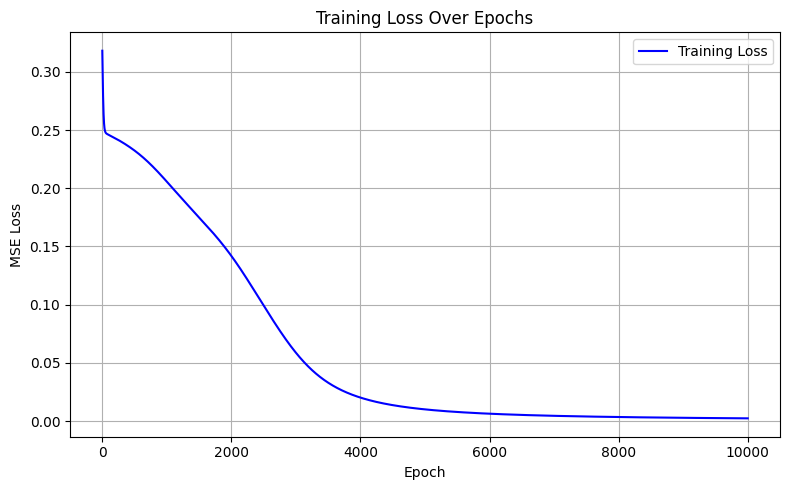

In [ ]:
import numpy as np

# 激活函数及其导数（使用 sigmoid）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 损失函数及导数（均方误差）
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_deriv(y_true, y_pred):
    return y_pred - y_true

# 数据集（简单的逻辑或函数）
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]) # shape: (4, 2)
y = np.array([[0], [1], [1], [0]])  # 可替换为 AND / OR

# 初始化网络结构：2-3-1
np.random.seed(42)
W1 = np.random.randn(2, 3)
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1)
b2 = np.zeros((1, 1))

# 训练参数
epochs = 10000
lr = 0.1
loss_history = []

# 训练过程
for epoch in range(epochs):
    # ----- Forward pass -----
    z1 = X @ W1 + b1        # shape: (4, 3)
    a1 = sigmoid(z1)        # shape: (4, 3)
    z2 = a1 @ W2 + b2       # shape: (4, 1)
    y_pred = sigmoid(z2)    # shape: (4, 1)

    # ----- Loss -----
    loss = mse_loss(y, y_pred)
    loss_history.append(loss)

    # ----- Backward pass -----
    dL_dy = mse_deriv(y, y_pred) * sigmoid_deriv(z2)  # shape: (4, 1)
    dL_dW2 = a1.T @ dL_dy                             # shape: (3, 1)
    dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)     # shape: (1, 1)

    dL_da1 = dL_dy @ W2.T                             # shape: (4, 3)
    dL_dz1 = dL_da1 * sigmoid_deriv(z1)               # shape: (4, 3)
    dL_dW1 = X.T @ dL_dz1                             # shape: (2, 3)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)    # shape: (1, 3)

    # ----- Parameter update -----
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1

    # 可视化中间结果
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ----- 测试结果 -----
print("\nPredictions after training:")
print(np.round(y_pred, 3))

# 可视化损失下降过程
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()